para realizar el codigo he realizado el siguiente razonamiento:
- **Problema** → necesidad de contar y ordenar.
- **Comparativa de estructuras** → árbol balanceable gana (escogi AVL).
- **Diseño de nodo** → clave + contador + punteros + campo de balanceo.
- **Uso de recursión** → evita pilas manuales, simplifica el código.
- **Listas dinámicas** para tokenización y recolección de resultados.
- **Algoritmo de inserción** con actualización de contador y rebalanceo AVL.
- **Recorrido in‑order y búsqueda** para extraer y consultar datos.

Lo represente en un diagrama de flujo de tres módulos:
1. Proceso general (process_text)
2. Subrutina de inserción (insert)
3. Recorrido in‑order (inOrderTraversal)

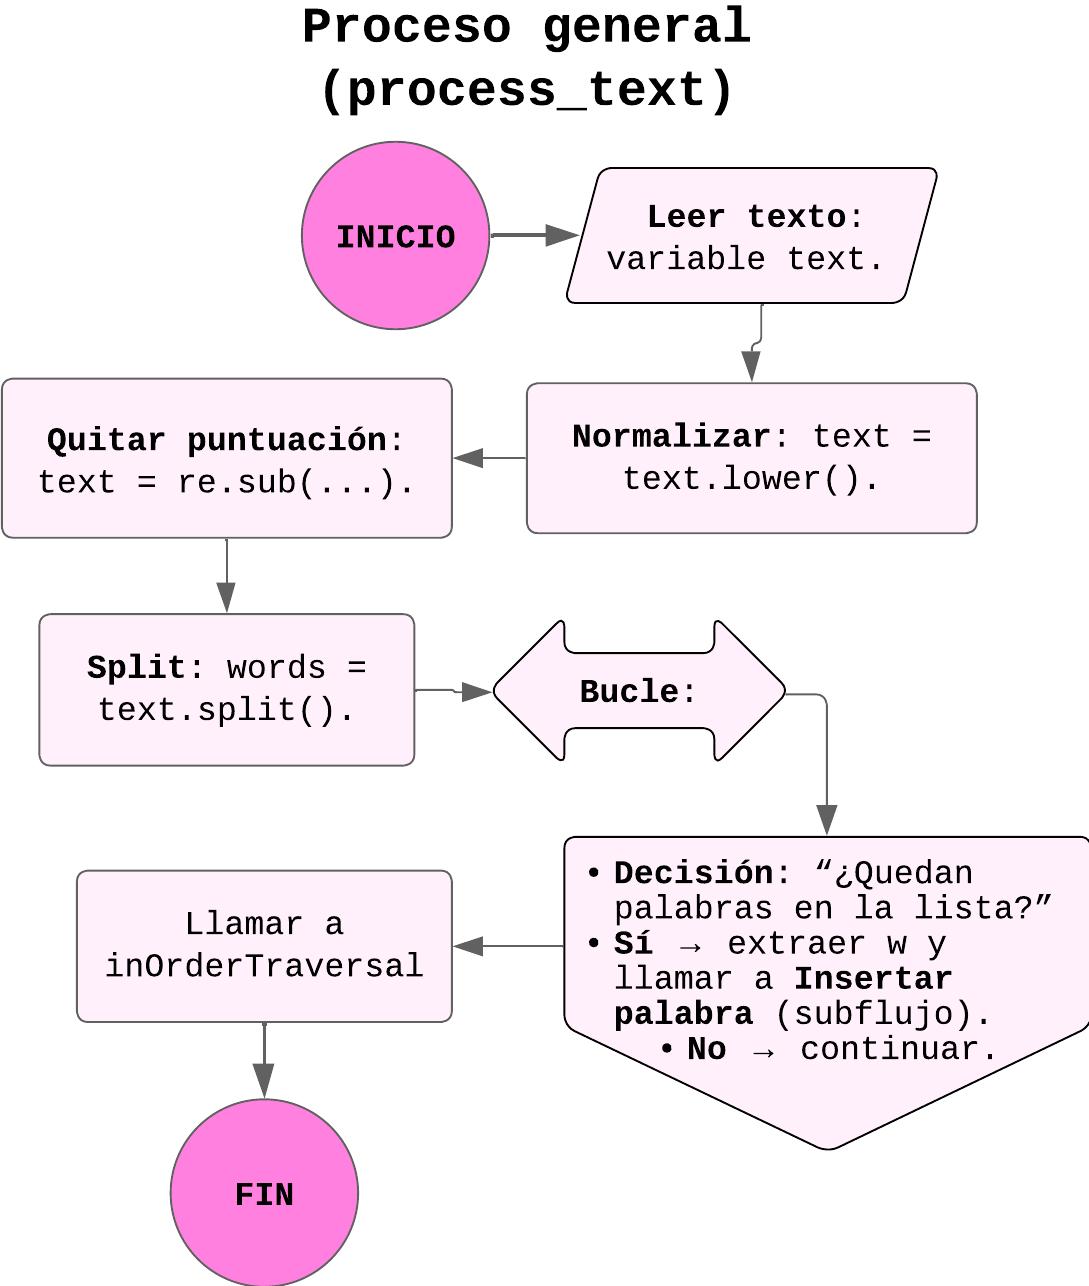
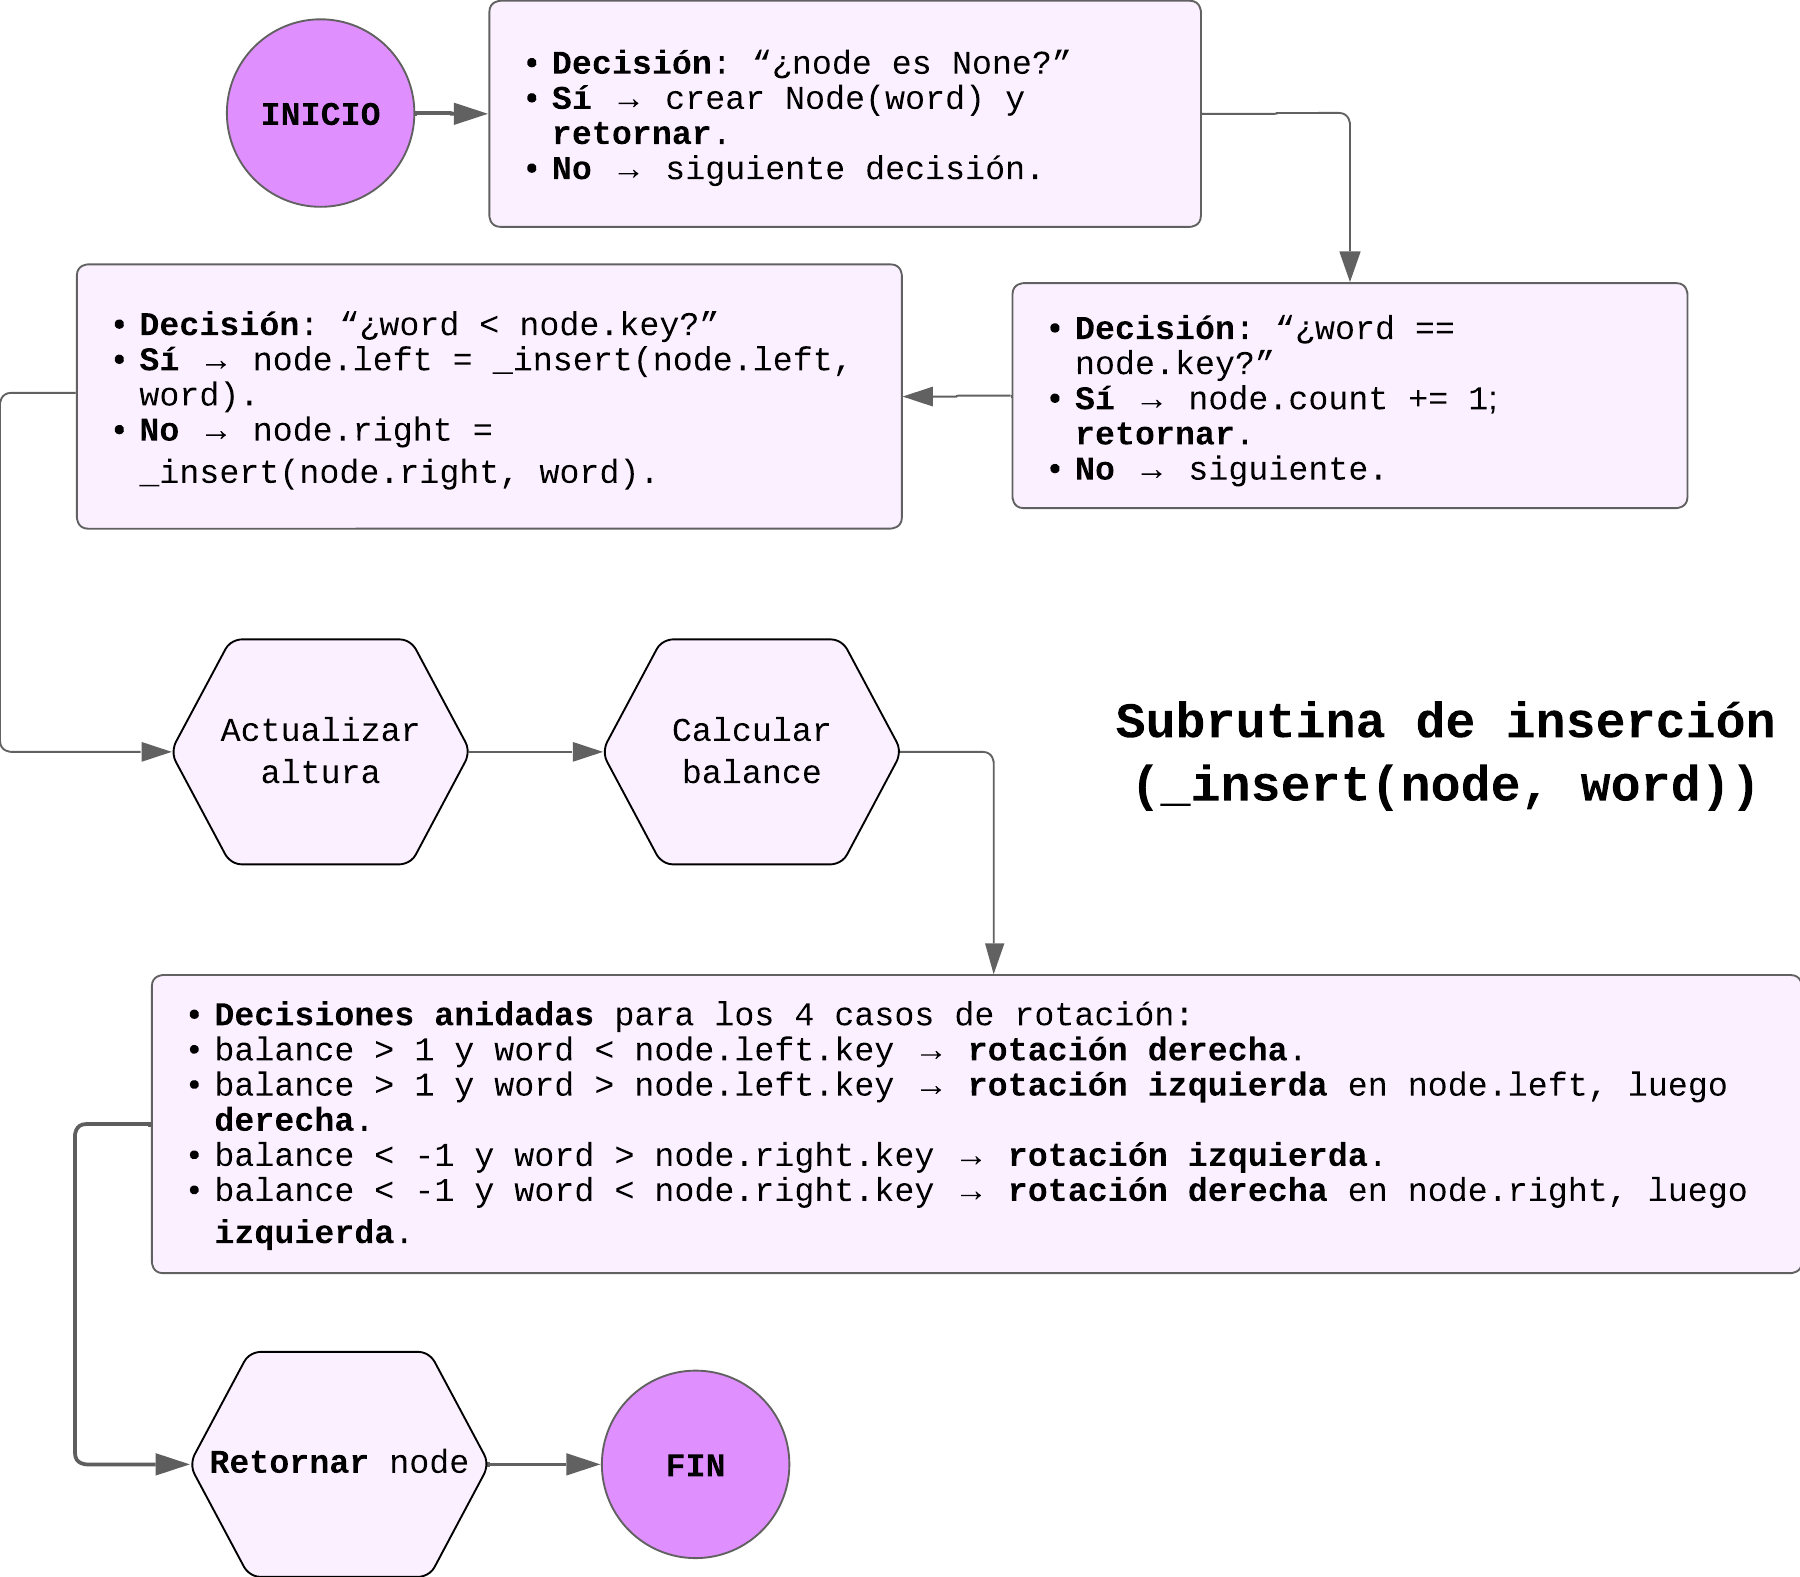
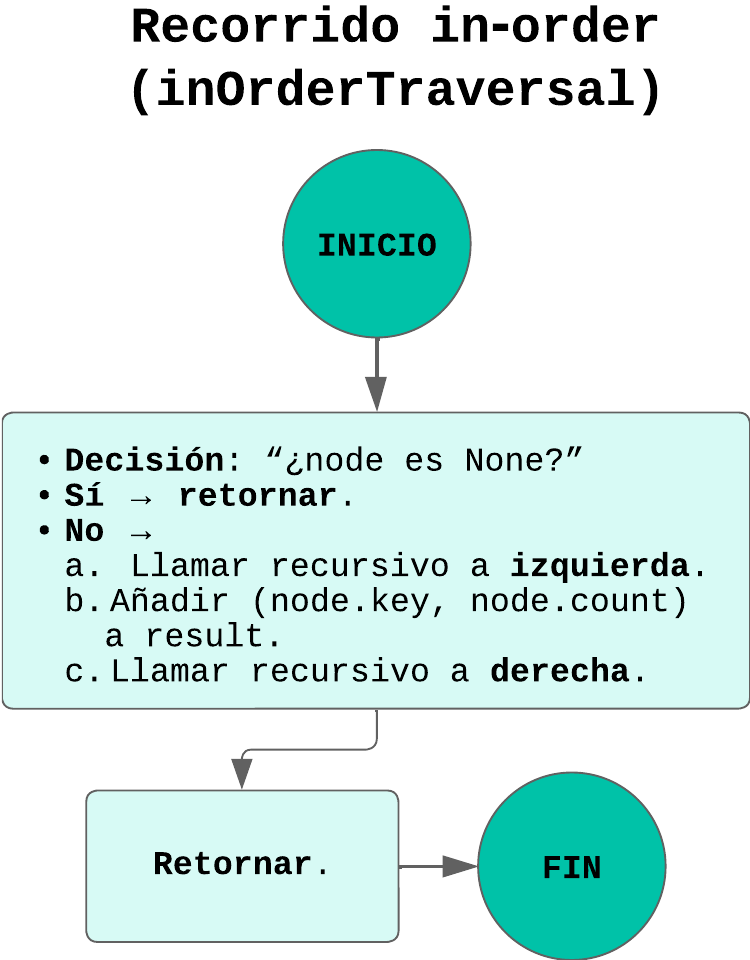


In [1]:
import re

class Event2:
    def __init__(self, timestamp, description):
        self.timestamp = timestamp
        self.description = description
        self.izquierda = None
        self.derecha = None
        self.altura = 1
        self.padre = None
        self.count = 1  # Añadido para mantener el conteo como en Node original

class Arbre:
    def __init__(self):
        self.raiz = None

    def altura(self, nodo):
        if nodo is None:
            return 0
        return nodo.altura

    def factor_equilibrio(self, nodo):
        return self.altura(nodo.izquierda) - self.altura(nodo.derecha) if nodo else 0

    def rotacion_derecha(self, z):
        y = z.izquierda
        T2 = y.derecha
        y.derecha = z
        z.izquierda = T2
        z.padre = y
        if T2:
            T2.padre = z
        y.padre = z.padre
        z.altura = 1 + max(self.altura(z.izquierda), self.altura(z.derecha))
        y.altura = 1 + max(self.altura(y.izquierda), self.altura(y.derecha))
        return y

    def rotacion_izquierda(self, z):
        y = z.derecha
        T2 = y.izquierda
        y.izquierda = z
        z.derecha = T2
        z.padre = y
        if T2:
            T2.padre = z
        y.padre = z.padre
        z.altura = 1 + max(self.altura(z.izquierda), self.altura(z.derecha))
        y.altura = 1 + max(self.altura(y.izquierda), self.altura(y.derecha))
        return y

    def insertar(self, nodo, timestamp, description, padre=None):
        if not nodo:
            nuevo = Event2(timestamp, description)
            nuevo.padre = padre
            return nuevo

        if timestamp == nodo.timestamp:
            nodo.count += 1
            return nodo
        elif timestamp < nodo.timestamp:
            nodo.izquierda = self.insertar(nodo.izquierda, timestamp, description, nodo)
        else:
            nodo.derecha = self.insertar(nodo.derecha, timestamp, description, nodo)

        nodo.altura = 1 + max(self.altura(nodo.izquierda), self.altura(nodo.derecha))
        balance = self.factor_equilibrio(nodo)

        if balance > 1 and timestamp < nodo.izquierda.timestamp:
            return self.rotacion_derecha(nodo)
        if balance < -1 and timestamp > nodo.derecha.timestamp:
            return self.rotacion_izquierda(nodo)
        if balance > 1 and timestamp > nodo.izquierda.timestamp:
            nodo.izquierda = self.rotacion_izquierda(nodo.izquierda)
            return self.rotacion_derecha(nodo)
        if balance < -1 and timestamp < nodo.derecha.timestamp:
            nodo.derecha = self.rotacion_derecha(nodo.derecha)
            return self.rotacion_izquierda(nodo)

        return nodo

    def insertar_clave(self, timestamp, description):
        self.raiz = self.insertar(self.raiz, timestamp, description)

    def in_order(self, nodo, resultado):
        if nodo is None:
            return
        self.in_order(nodo.izquierda, resultado)
        resultado.append((nodo.timestamp, nodo.count))
        self.in_order(nodo.derecha, resultado)

    def obtener_cuenta(self, timestamp):
        nodo = self.raiz
        while nodo:
            if timestamp == nodo.timestamp:
                return nodo.count
            elif timestamp < nodo.timestamp:
                nodo = nodo.izquierda
            else:
                nodo = nodo.derecha
        return 0

# Funciones adaptadas
def process_text(text, tree):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    for w in text.split():
        tree.insertar_clave(w, f"palabra: {w}")

def get_word_count(word, tree):
    return tree.obtener_cuenta(word)

# Prueba de uso
if __name__ == "__main__":
    texto = "el arbol rojo y el arbol negro son arboles balanceados el arbol avl tambien"
    mi_arbol = Arbre()
    process_text(texto, mi_arbol)

    ordenado = []
    mi_arbol.in_order(mi_arbol.raiz, ordenado)
    print("Frecuencias ordenadas:", ordenado)

    print("Cuenta de 'arbol':", get_word_count('arbol', mi_arbol))   # 4
    print("Cuenta de 'rojo':", get_word_count('rojo', mi_arbol))     # 1
    print("Cuenta de 'verde':", get_word_count('verde', mi_arbol))   # 0


Frecuencias ordenadas: [('arbol', 3), ('arboles', 1), ('avl', 1), ('balanceados', 1), ('el', 3), ('negro', 1), ('rojo', 1), ('son', 1), ('tambien', 1), ('y', 1)]
Cuenta de 'arbol': 3
Cuenta de 'rojo': 1
Cuenta de 'verde': 0
